### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 4

#### Дисциплина: Интеллектуальный анализ данных

##### Студент: Сатлихана Петрити
##### Группа:   НПИбд-02-21

## Москва 2024
***

### **Вариант** **8**
### Breast Cancer Wisconsin (Diagnostic) Data Set
### Название файла: wdbc.data
### Ссылка: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
### Первый признак: perimeter (столбец No 5)
### Второй признак: area (столбец No 6)
### Третий признак: fractal dimension (столбец No 12)
### Класс: Outcome (столбец No 1)
### Метод обработки пропущенных значений – медиана класса
### Метод нормализации признаков – масштабирование на интервал [0, 1]
### Алгоритм снижения размерности данных – одномерный отбор признаков (SelectKBest)
### Метод валидации модели – кросс-валидация по отдельным объектам
### Показатель качества модели – точность (precision)






In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса.

In [2]:
import pandas as pd

In [5]:
# # Загрузка набора данных
path = '/content/drive/MyDrive/University/Viti IV/1 SEMESTER/Интеллектуальный анализ данных/Lab 5/wdbc.data'
data = pd.read_csv(path, header=None)
perimeter = data[4]
area = data[5]
fractal_dimension =data[12]
outcome = data[1]
print("Первый признак: perimeter (столбец No 5):")
print(perimeter.head())
print("\nВторой признак: area (столбец No 6):")
print(area.head())
print("\nТретий признак: fractal dimension(столбец No 12):")
print(fractal_dimension.head())
print("\nКласс: Outcome (столбец No 1):")
print(outcome.head())


Первый признак: perimeter (столбец No 5):
0    122.80
1    132.90
2    130.00
3     77.58
4    135.10
Name: 4, dtype: float64

Второй признак: area (столбец No 6):
0    1001.0
1    1326.0
2    1203.0
3     386.1
4    1297.0
Name: 5, dtype: float64

Третий признак: fractal dimension(столбец No 12):
0    1.0950
1    0.5435
2    0.7456
3    0.4956
4    0.7572
Name: 12, dtype: float64

Класс: Outcome (столбец No 1):
0    M
1    M
2    M
3    M
4    M
Name: 1, dtype: object


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами при помощи стандартизованной оценки (Z-score) . Выберите параметры стандартизованной оценки таким образом, чтобы выбросы составляли от 1% до 10% всех точек набора данных. Если количество различных меток классов превышает 4, то уменьшите количество классов.

In [6]:
missing_outcomes = outcome.isnull().sum()
print(f"Количество пропущенных значений в Outcome: {missing_outcomes}")


Количество пропущенных значений в Outcome: 0


In [7]:
missing_perimeter = perimeter.isnull().sum()
missing_area = area.isnull().sum()
missing_fractal_dimension = fractal_dimension.isnull().sum()

print(f"Количество пропущенных значений  в 'perimeter': {missing_perimeter}")
print(f"Количество пропущенных значений в 'area': {missing_area}")
print(f"Количество пропущенных значений в 'fractal_dimension': {missing_fractal_dimension}")

Количество пропущенных значений  в 'perimeter': 0
Количество пропущенных значений в 'area': 0
Количество пропущенных значений в 'fractal_dimension': 0


In [ ]:
import numpy as np
from scipy import stats

In [ ]:
features = data[[4, 5, 12]]
# Z-оценки для выбранных признаков
z_scores = np.abs(stats.zscore(features))
# порог для удаления выбросов (может варьироваться от 1% до 10% данных)
threshold = 3.0
# Фильтровать данные, удаляя строки, где любой признак имеет Z-оценку выше 3.0
outliers = (z_scores > threshold).any(axis=1)
data_cleaned = data[~outliers]
removed_percentage = (outliers.sum() / len(data)) * 100
print(f"Удалено {removed_percentage:.2f}% данных.")

Удалено 2.11% данных.


In [ ]:
# количество уникальных классов
# Bсего два класса
unique_classes = outcome.nunique()
print(f"Количество уникальных классов: {unique_classes}")

Количество уникальных классов: 2


3. Нормализуйте признаки набора данных методом, указанным в индивидуальном задании.

In [ ]:
features_to_normalize = data_cleaned[[4, 5, 12]]
# Нормализация методом Min-Max
normalized_features = (features_to_normalize - features_to_normalize.min()) / (features_to_normalize.max() - features_to_normalize.min())
# Замена исходных столбцов признаков нормализованными значениями в наборе данных
data_cleaned.loc[:, [4, 5, 12]] = normalized_features
print("Признаки нормализованы в диапазоне [0, 1]:")
print(data_cleaned.head())


Признаки нормализованы в диапазоне [0, 1]:
         0  1      2      3         4         5        6        7       8   \
0    842302  M  17.99  10.38  0.686387  0.555916  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  0.774129  0.766613  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  0.748936  0.686872  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38  0.293545  0.157277  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  0.793241  0.747812  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

 

4. Визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.


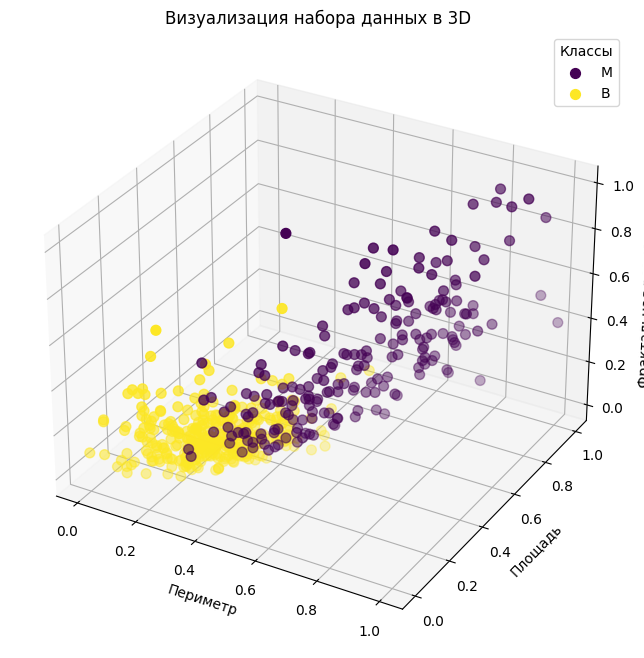

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

features_to_plot = data_cleaned[[4, 5, 12]]
classes = outcome[data_cleaned.index]
# 3D график
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Уникальные классы и их цвета
unique_classes = classes.unique()
colors = plt.colormaps['viridis'](np.linspace(0, 1, len(unique_classes)))
for i, class_label in enumerate(unique_classes):
    class_data = features_to_plot[classes == class_label]
    ax.scatter(class_data.iloc[:, 0], class_data.iloc[:, 1], class_data.iloc[:, 2],
                color=colors[i], label=class_label, s=50)
ax.set_xlabel('Периметр')
ax.set_ylabel('Площадь')
ax.set_zlabel('Фрактальная размерность')
ax.set_title('Визуализация набора данных в 3D')
ax.legend(title='Классы')
plt.show()


5. Используя алгоритм снижения размерности данных, указанный в индивидуальном задании, уменьшите размерность признакового пространства до двух и визуализируйте набор данных в виде точек на плоскости, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Признаки и классы для SelectKBest
X = data_cleaned[[4, 5, 12]]
y = outcome[data_cleaned.index]

# SelectKBest для выбора 2 лучших признаков
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
# Принятие значений индекса выбранных признаков
selected_features_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features_indices].tolist()
print("Выбранные признаки:", selected_feature_names)

Выбранные признаки: [4, 5]


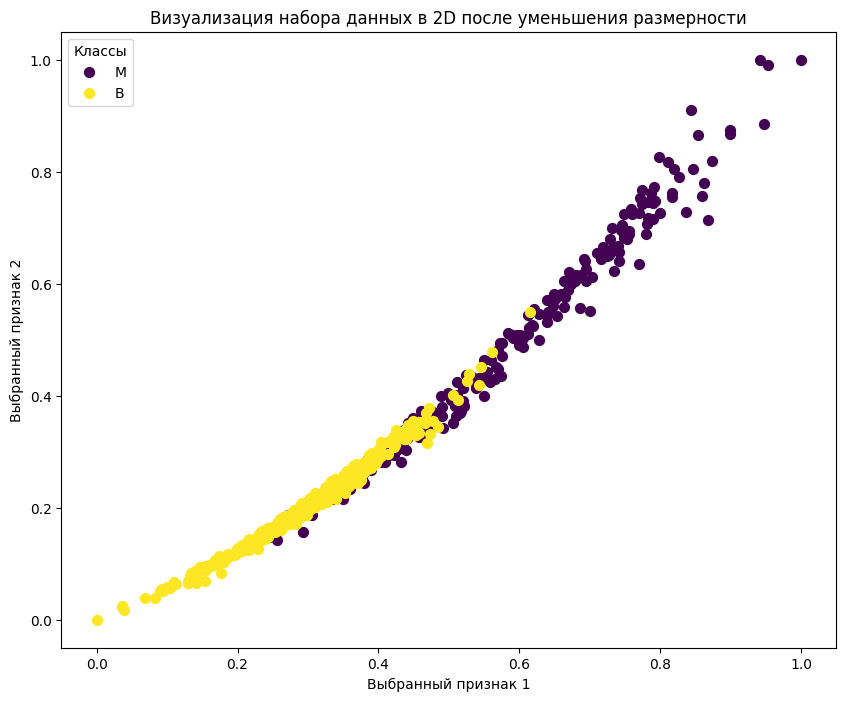

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
unique_classes = y.unique()
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(unique_classes)))
for i, class_label in enumerate(unique_classes):
    ax.scatter(X_new[y == class_label][:, 0], X_new[y == class_label][:, 1],
               color=colors[i], label=class_label, s=50)
ax.set_xlabel('Выбранный признак 1')
ax.set_ylabel('Выбранный признак 2')
ax.set_title('Визуализация набора данных в 2D после уменьшения размерности')
ax.legend(title='Классы')
plt.show()

6. Используя разделение набора данных из двух признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К<10 и определите оптимальное значение параметра К с минимальной долей ошибок.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
X = data_cleaned[[4, 5]]  # два выбранных признака
y = outcome[data_cleaned.index]
# Разделение данные на обучающую и тестовую выборки (75% обучение, 25% тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Обучение KNN для разных значений K и оцениваем модель
error_rates = []
#Цикл по значениям K от 1 до 9
for k in range(1, 10):
    # Initialize the KNN classifier with current K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    error_rate = 1 - accuracy
    error_rates.append(error_rate)
# оптимальное K с минимальной долей ошибок
optimal_k = np.argmin(error_rates) + 1
min_error_rate = min(error_rates)
print(f"Оптимальное значение K: {optimal_k}")
print(f"Минимальная доля ошибок: {min_error_rate:.4f}")


Оптимальное значение K: 9
Минимальная доля ошибок: 0.0857


7. Для найденного значения K постройте и выведите на экран отчет о классификации и матрицу ошибок.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# обучение модель KNN с оптимальным K
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)
report = classification_report(y_test, y_pred_optimal)
print("Отчет о классификации:\n", report)
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
print("Матрица ошибок:\n", conf_matrix)


Отчет о классификации:
               precision    recall  f1-score   support

           B       0.89      0.97      0.93        79
           M       0.96      0.84      0.89        61

    accuracy                           0.91       140
   macro avg       0.92      0.91      0.91       140
weighted avg       0.92      0.91      0.91       140

Матрица ошибок:
 [[77  2]
 [10 51]]


8. Создайте модели классификации точек набора данных из трех признаков на базе следующих классификаторов:
 - наивного байесовского классификатора
 - классификатора метода К ближайших соседей для значения К, определенного в п. 6.


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X_three_features = data_cleaned[[4, 5, 12]]
y_three_features = outcome[data_cleaned.index]

# 75% обучающая, 25% тестовая
X_train_three, X_test_three, y_train_three, y_test_three = train_test_split(X_three_features, y_three_features, test_size=0.25, random_state=42)

# 1. Наивный байесовский классификатор
naive_bayes_classifier = GaussianNB()  # Instantiate the classifier
naive_bayes_classifier.fit(X_train_three, y_train_three)  # Fit the model
y_pred_nb = naive_bayes_classifier.predict(X_test_three)

# классификации и матрица ошибок для Наивного Байеса
report_nb = classification_report(y_test_three, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test_three, y_pred_nb)

print("Наивный байесовский классификатор:")
print("Отчет о классификации:\n", report_nb)
print("Матрица ошибок:\n", conf_matrix_nb)


Наивный байесовский классификатор:
Отчет о классификации:
               precision    recall  f1-score   support

           B       0.87      0.96      0.92        79
           M       0.94      0.82      0.88        61

    accuracy                           0.90       140
   macro avg       0.91      0.89      0.90       140
weighted avg       0.90      0.90      0.90       140

Матрица ошибок:
 [[76  3]
 [11 50]]


In [ ]:
# 2.Классификатор метода К ближайших соседей с найденным K=9
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train_three, y_train_three)  # Fit the model
y_pred_knn = knn_classifier.predict(X_test_three)

# классификации и матрица ошибок для KNN
report_knn = classification_report(y_test_three, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test_three, y_pred_knn)

print("\nКлассификатор метода К ближайших соседей:")
print("Отчет о классификации:\n", report_knn)
print("Матрица ошибок:\n", conf_matrix_knn)



Классификатор метода К ближайших соседей:
Отчет о классификации:
               precision    recall  f1-score   support

           B       0.88      0.94      0.91        79
           M       0.91      0.84      0.87        61

    accuracy                           0.89       140
   macro avg       0.90      0.89      0.89       140
weighted avg       0.89      0.89      0.89       140

Матрица ошибок:
 [[74  5]
 [10 51]]


9. Используя указанный в индивидуальном задании метод валидации модели, проведите для набора данных из трех признаков оценку качества классификаторов из п. 8 относительно показателя, указанного в индивидуальном задании, и выведите на экран среднее значение и дисперсию этого показателя.


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# 1.Кросс-валидация для наивного байесовского классификатора
nb_precision_scores = cross_val_score(naive_bayes_classifier, X_three_features, y_three_features, cv=5, scoring='precision_macro')

# 2.Кросс-валидация для классификатора K ближайших соседей
knn_precision_scores = cross_val_score(knn_classifier, X_three_features, y_three_features, cv=5, scoring='precision_macro')

# Вычисление среднего значения и дисперсии показателей точности
nb_avg = nb_precision_scores.mean()
nb_variance = nb_precision_scores.var()

knn_avg = knn_precision_scores.mean()
knn_variance = knn_precision_scores.var()

print("Наивный байесовский классификатор:")
print(f"Среднее значение точности: {nb_avg:.4f}")
print(f"Дисперсия точности: {nb_variance:.4f}")
print("\nКлассификатор метода К ближайших соседей (K=9):")
print(f"Среднее значение точности: {knn_avg:.4f}")
print(f"Дисперсия точности: {knn_variance:.4f}")

Наивный байесовский классификатор:
Среднее значение точности: 0.8925
Дисперсия точности: 0.0015

Классификатор метода К ближайших соседей (K=9):
Среднее значение точности: 0.8938
Дисперсия точности: 0.0018


10. Определите, какой из классификаторов позволяет получить более высокое среднее значение показателя классификации, проведите классификацию точек набора данных этим классификатором и визуализируйте набор данных в виде точек трехмерного пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.


In [ ]:
# Сравнение средних значений точности
if nb_avg > knn_avg:
    best_classifier = "Наивный байесовский классификатор"
    model = naive_bayes_classifier
else:
    best_classifier = "Классификатор метода К ближайших соседей "
    model = knn_classifier

print(f"Лучший классификатор: {best_classifier}")

Лучший классификатор: Классификатор метода К ближайших соседей 


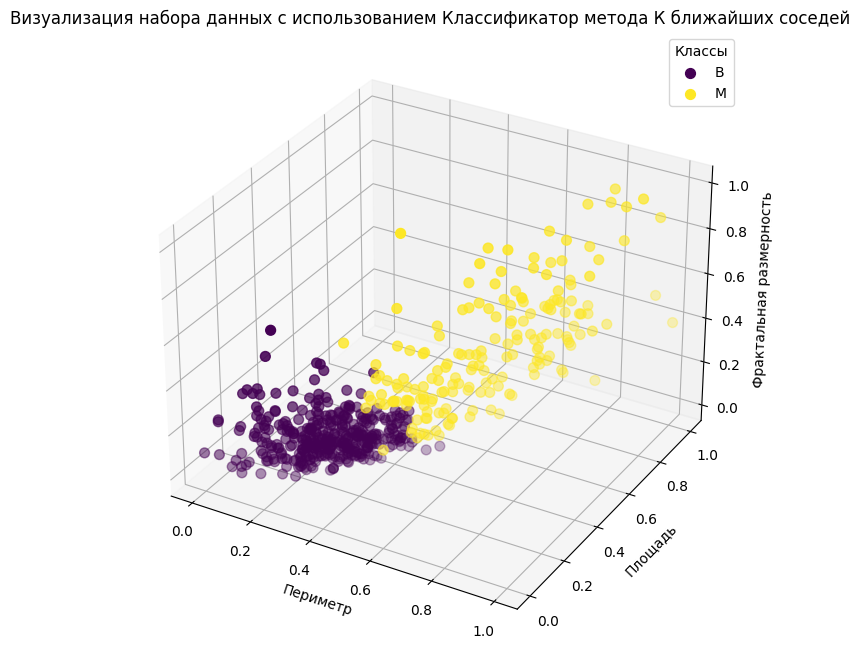

In [ ]:
# Обучение по выбранному классификатору
model.fit(X_three_features, y_three_features)
# Делаем предсказания на всем наборе данных
predictions = model.predict(X_three_features)

# Создаем 3D график разброса
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Уникальные классы из предсказаний
unique_classes = np.unique(predictions)
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(unique_classes)))

# График разброса для каждого класса
for i, class_label in enumerate(unique_classes):
    class_data = X_three_features[predictions == class_label]
    ax.scatter(class_data.iloc[:, 0], class_data.iloc[:, 1], class_data.iloc[:, 2],
               color=colors[i], label=class_label, s=50)

ax.set_xlabel('Периметр')
ax.set_ylabel('Площадь')
ax.set_zlabel('Фрактальная размерность')
ax.set_title(f'Визуализация набора данных с использованием {best_classifier}')
ax.legend(title='Классы')
plt.show()